## Tugas Data Mining Kelompok 2
### Anggota:
- Naufal Faiz Nugraha (020)
- Bagus Febriansyah Pratama (144)
- Otniel Glory Joseputra P (151)

## Import Library

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
from scipy.stats import skew
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Download Dataset

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

In [4]:
# buat dataframe dari X dan y
df = pd.concat([X, y], axis=1)
df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,0,0,no(M2 and SIP pres)


## Data Understanding

In [5]:
# cek shape dataset
df.shape

(9105, 45)

In [6]:
# cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

In [7]:
# deskriptif statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9105.0,62.650823,15.593710,18.041990,52.797000,64.856990,73.998960,1.018480e+02
num.co,9105.0,1.868644,1.344409,0.000000,1.000000,2.000000,3.000000,9.000000e+00
edu,7471.0,11.747691,3.447743,0.000000,10.000000,12.000000,14.000000,3.100000e+01
scoma,9104.0,12.058546,24.636694,0.000000,0.000000,0.000000,9.000000,1.000000e+02
charges,8933.0,59995.787811,102648.778198,1169.000000,9740.000000,25024.000000,64598.000000,1.435423e+06
totcst,8217.0,30825.867768,45780.820986,0.000000,5929.566400,14452.734400,36087.937500,6.332120e+05
totmcst,5630.0,28828.877838,43604.261932,-102.719970,5177.404300,13223.500000,34223.601600,7.106820e+05
avtisst,9023.0,22.610928,13.233248,1.000000,12.000000,19.500000,31.666656,8.300000e+01
sps,9104.0,25.525872,9.899377,0.199982,19.000000,23.898438,30.199219,9.918750e+01
aps,9104.0,37.597979,19.903852,0.000000,23.000000,34.000000,49.000000,1.430000e+02


In [8]:
# memisahkan fitur berdasarkan tipe
cats = [i for i in df.columns if df[i].dtypes == 'O']
nums = [i for i in df.columns if df[i].dtypes != 'O']

# print len cats n nums
print(f'Jumlah fitur kategorikal: {len(cats)}')
print(f'Jumlah fitur numerik: {len(nums)}')

Jumlah fitur kategorikal: 8
Jumlah fitur numerik: 37


In [9]:
# nilai nunique nums
for i in nums:
  print(f'Nilai nunique pada fitur {i}: {df[i].nunique()}')

Nilai nunique pada fitur age: 7323
Nilai nunique pada fitur num.co: 10
Nilai nunique pada fitur edu: 31
Nilai nunique pada fitur scoma: 11
Nilai nunique pada fitur charges: 8501
Nilai nunique pada fitur totcst: 8197
Nilai nunique pada fitur totmcst: 5516
Nilai nunique pada fitur avtisst: 352
Nilai nunique pada fitur sps: 604
Nilai nunique pada fitur aps: 125
Nilai nunique pada fitur surv2m: 949
Nilai nunique pada fitur surv6m: 936
Nilai nunique pada fitur hday: 85
Nilai nunique pada fitur diabetes: 2
Nilai nunique pada fitur dementia: 2
Nilai nunique pada fitur prg2m: 51
Nilai nunique pada fitur prg6m: 87
Nilai nunique pada fitur dnrday: 177
Nilai nunique pada fitur meanbp: 164
Nilai nunique pada fitur wblc: 499
Nilai nunique pada fitur hrt: 186
Nilai nunique pada fitur resp: 66
Nilai nunique pada fitur temp: 98
Nilai nunique pada fitur pafi: 1457
Nilai nunique pada fitur alb: 60
Nilai nunique pada fitur bili: 295
Nilai nunique pada fitur crea: 130
Nilai nunique pada fitur sod: 60
Nila

In [10]:
# deskriptif statistic fitur cats
df[cats].describe().T

,count,unique,top,freq
sex,9105,2,male,5125
dzgroup,9105,8,ARF/MOSF w/Sepsis,3515
dzclass,9105,4,ARF/MOSF,4227
income,6123,4,under $11k,2855
race,9063,5,white,7191
ca,9105,3,no,5995
dnr,9075,3,no dnr,5880
sfdm2,7705,5,<2 mo. follow-up,3123


In [11]:
# cek nilai unik pada fitur cats
for i in cats:
  print(f'Jumlah nilai unik pada fitur {i}: {df[i].nunique()}')
  print(f'Nilai unik pada fitur {i}: {df[i].unique()}')
  print('-'*50)

Jumlah nilai unik pada fitur sex: 2
Nilai unik pada fitur sex: ['male' 'female']
--------------------------------------------------
Jumlah nilai unik pada fitur dzgroup: 8
Nilai unik pada fitur dzgroup: ['Lung Cancer' 'Cirrhosis' 'ARF/MOSF w/Sepsis' 'Coma' 'CHF' 'Colon Cancer'
 'COPD' 'MOSF w/Malig']
--------------------------------------------------
Jumlah nilai unik pada fitur dzclass: 4
Nilai unik pada fitur dzclass: ['Cancer' 'COPD/CHF/Cirrhosis' 'ARF/MOSF' 'Coma']
--------------------------------------------------
Jumlah nilai unik pada fitur income: 4
Nilai unik pada fitur income: ['$11-$25k' 'under $11k' nan '$25-$50k' '>$50k']
--------------------------------------------------
Jumlah nilai unik pada fitur race: 5
Nilai unik pada fitur race: ['other' 'white' 'black' 'hispanic' 'asian' nan]
--------------------------------------------------
Jumlah nilai unik pada fitur ca: 3
Nilai unik pada fitur ca: ['metastatic' 'no' 'yes']
--------------------------------------------------
Jum

In [12]:
# cek skewness
df[nums].skew()

,0
age,-0.502116
num.co,0.823294
edu,-0.058267
scoma,2.333585
charges,4.687144
totcst,3.955230
totmcst,4.363700
avtisst,0.766345
sps,1.604662
aps,0.944986


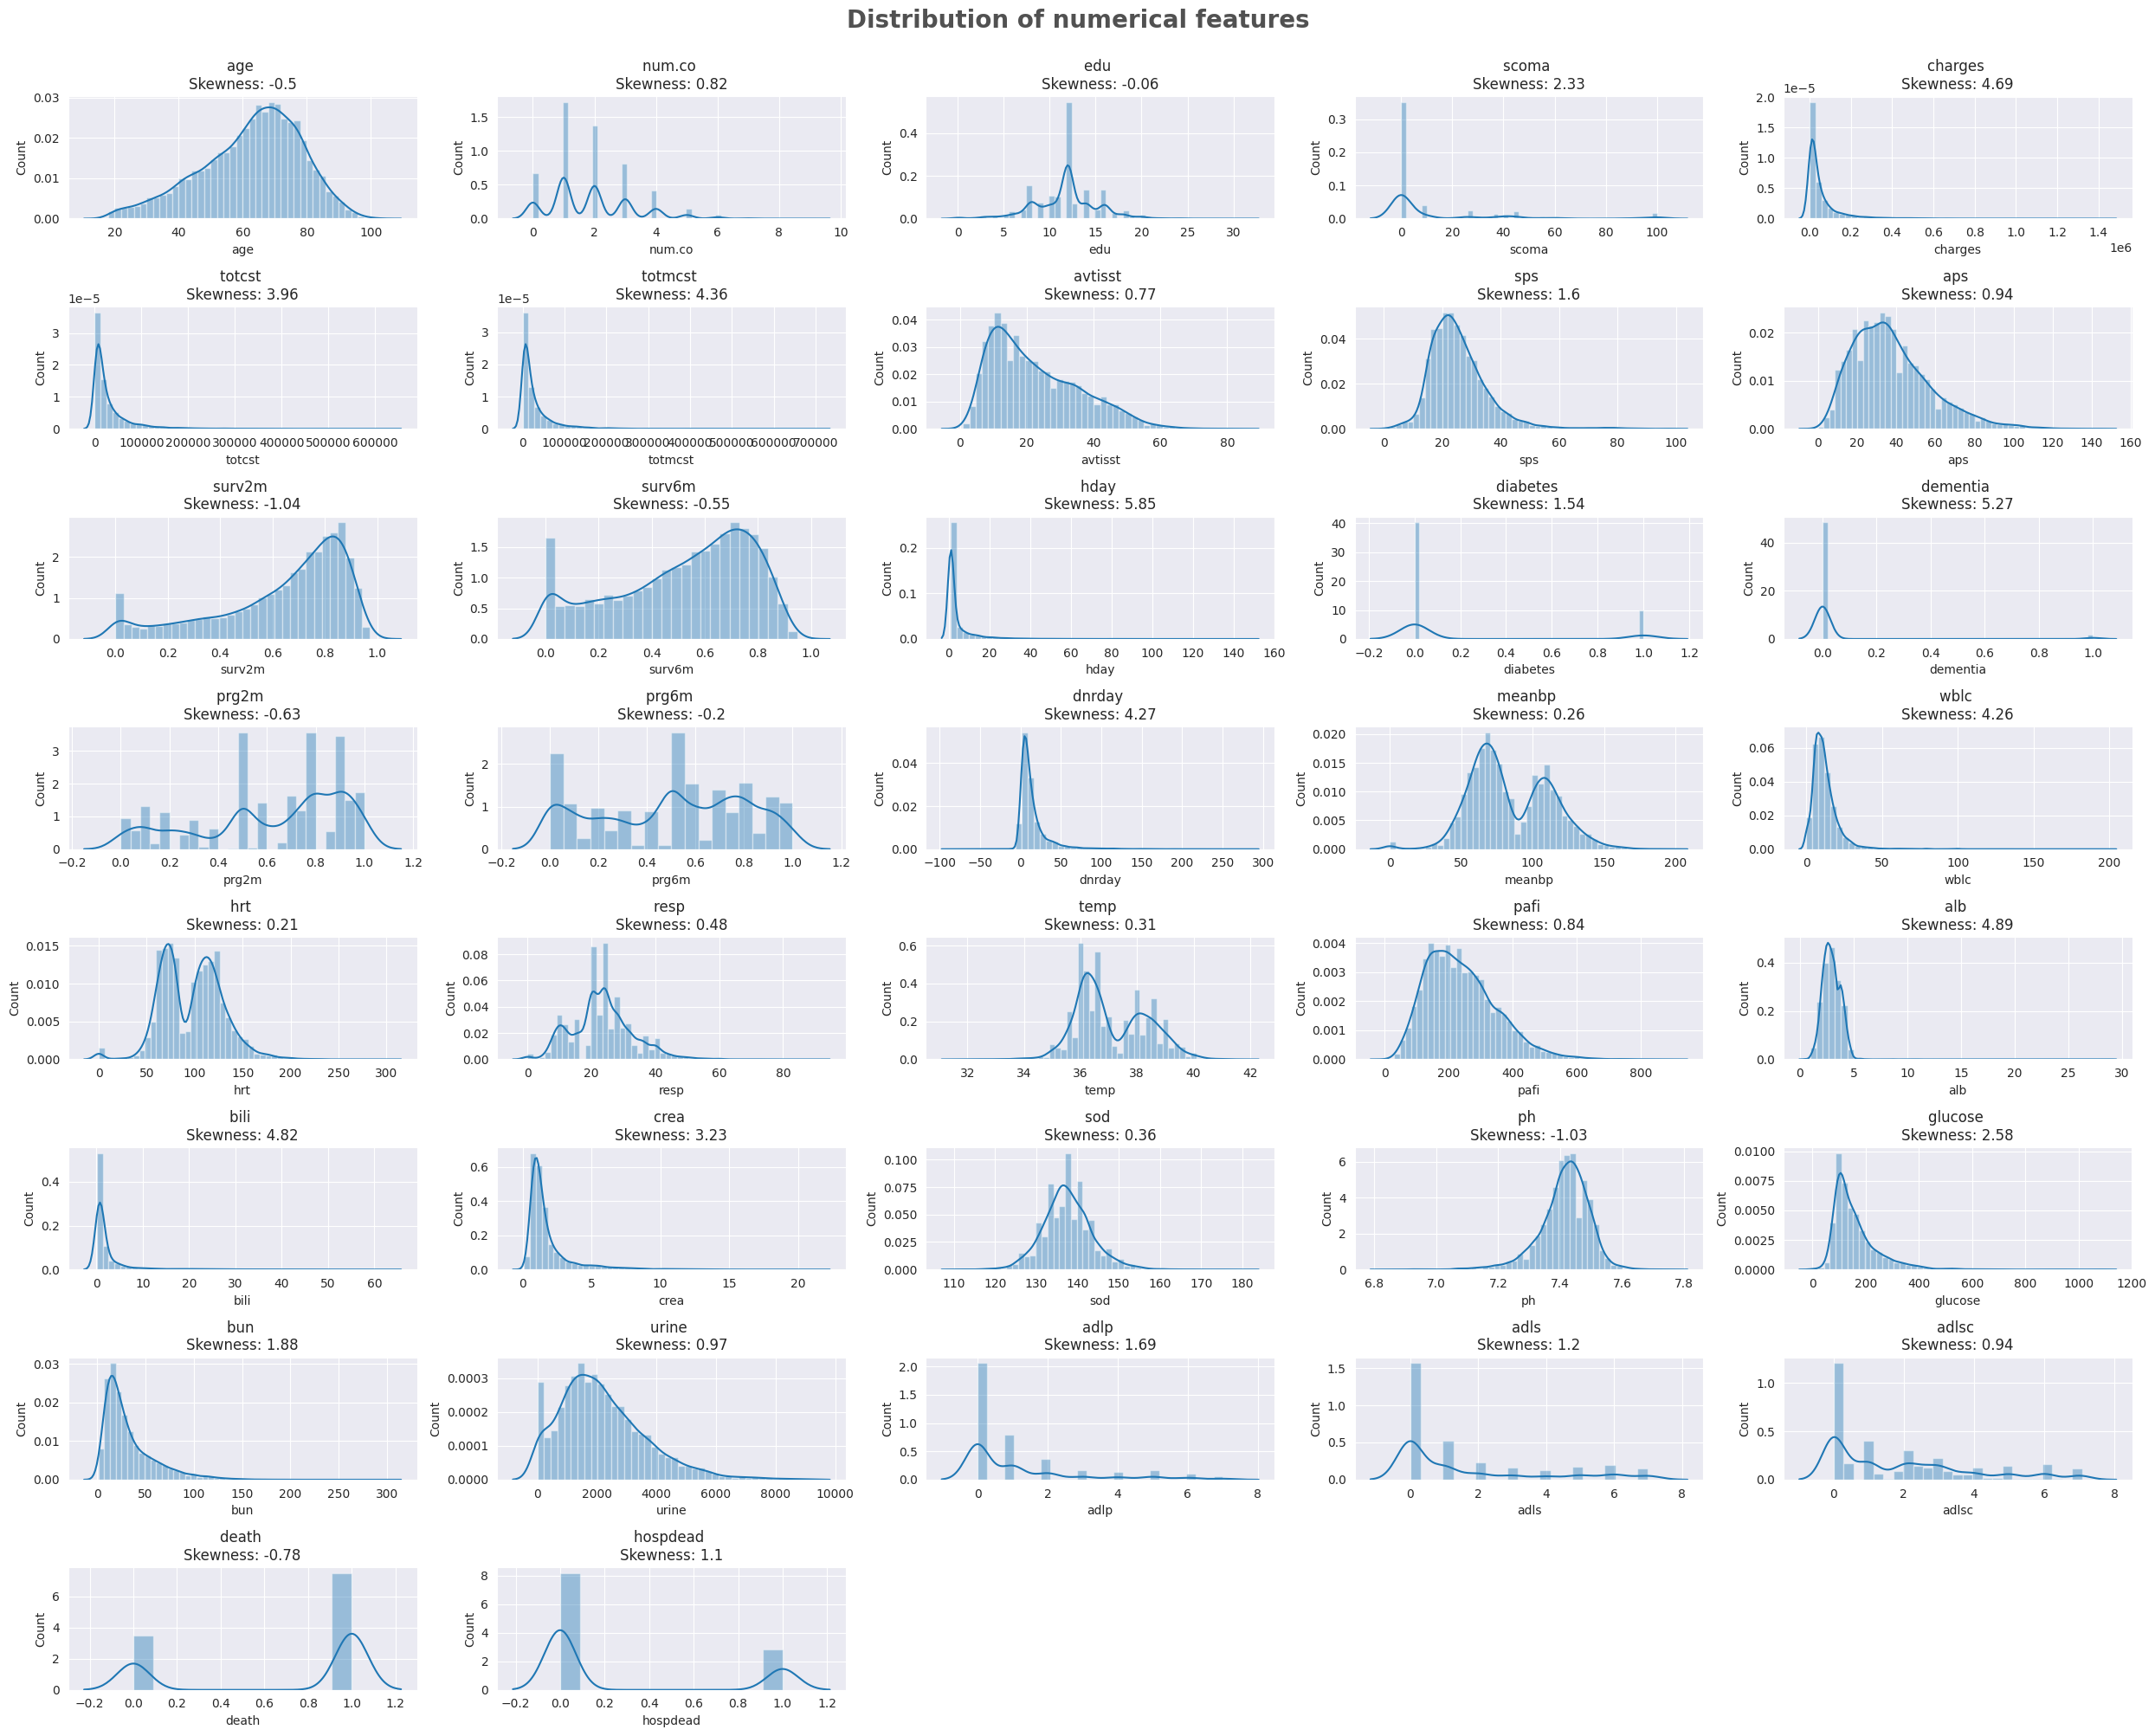

In [13]:
# cek distribusi fitur numerik menggunakan function
def check_dist(df):
  plt.figure(figsize=(25, 20))
  plt.suptitle('Distribution of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

  for i, j in enumerate(nums):
    plt.subplot(8, 5, i+1)
    sns.distplot(df[j])
    plt.title(f'{j} \nSkewness: {round(df[j].skew(),2)}')
    plt.xlabel(j)
    plt.ylabel('Count')

  plt.tight_layout()
  plt.show()

check_dist(df)

In [14]:
# hadnling skewness with log
skew_feature = df[nums].skew()[df[nums].skew() > 0.5].index
skew_feature = skew_feature.drop(['num.co','adlp', 'adls', 'dnrday'])
skew_feature

Index(['scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
       'hday', 'diabetes', 'dementia', 'wblc', 'pafi', 'alb', 'bili', 'crea',
       'glucose', 'bun', 'urine', 'adlsc', 'hospdead'],
      dtype='object')

In [15]:
# looping skew feature
for i in skew_feature:
  df[i] = np.log1p(df[i])

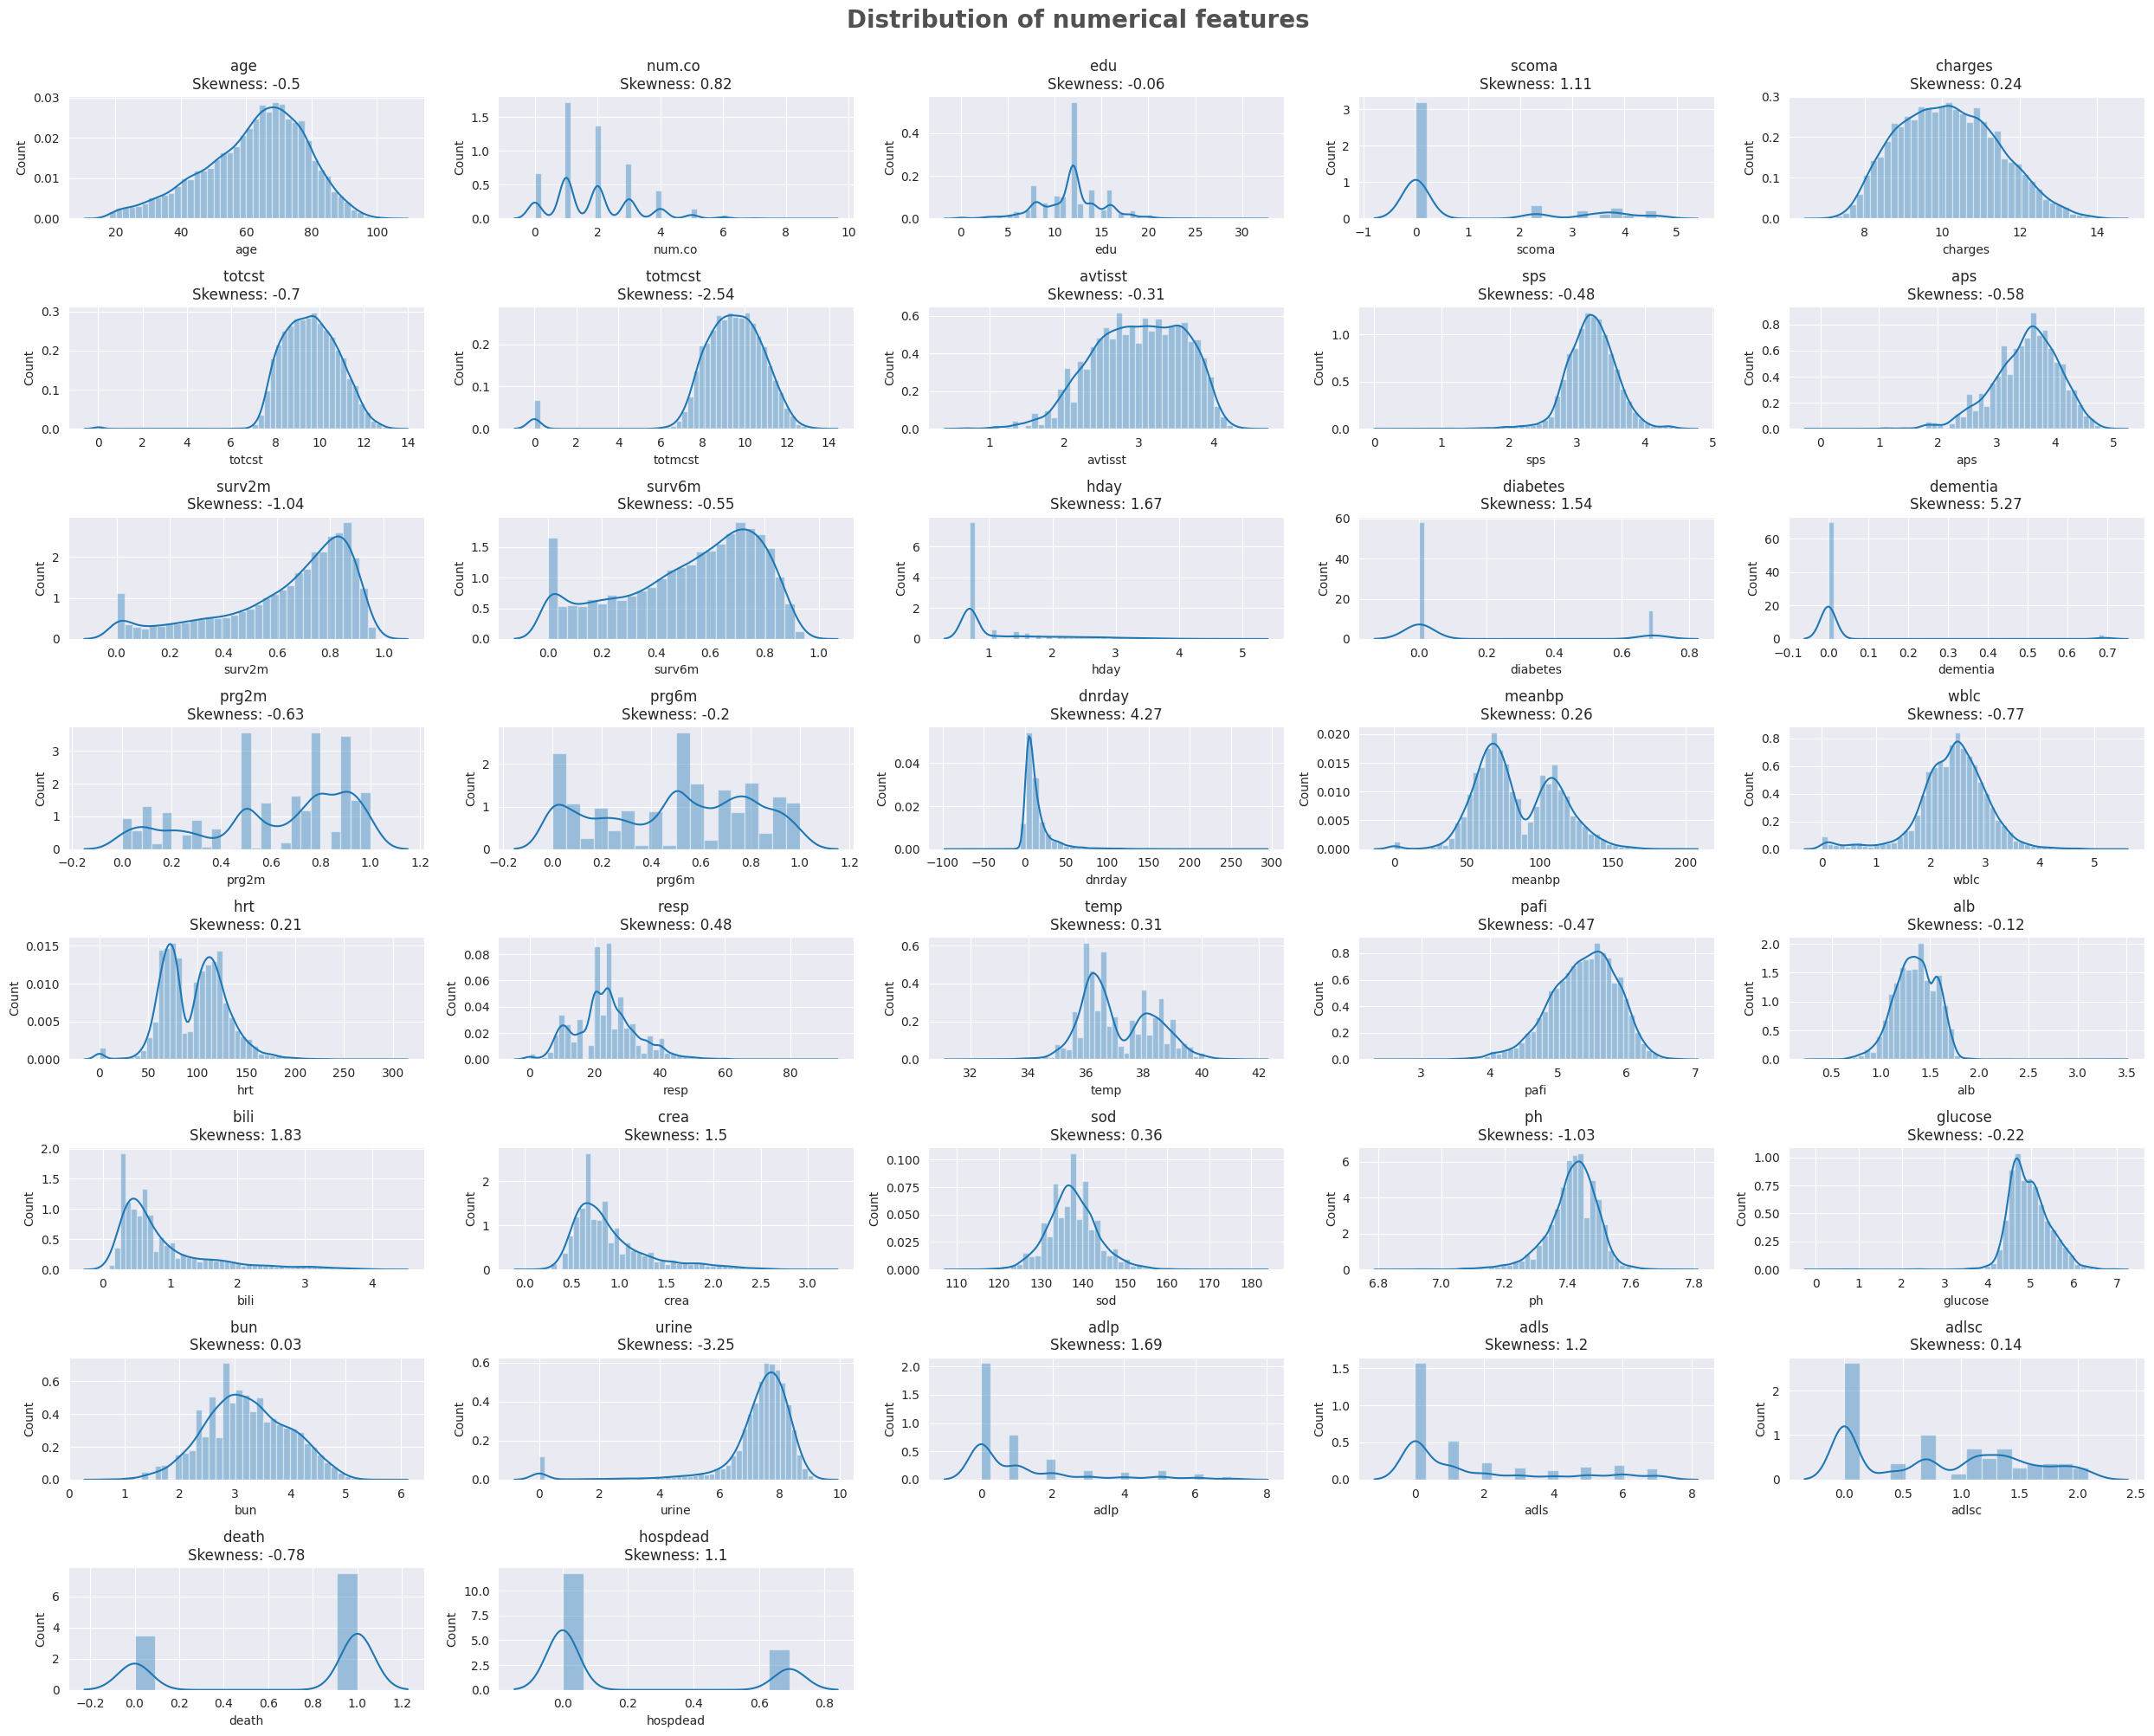

In [16]:
# cek skewness kembali
check_dist(df)

## Data Preprocessing

In [17]:
# # drop target fitur selain death
# df.drop(columns=['hospdead', 'sfdm2'], inplace=True)

In [18]:
# cek null value
null_val = df.isnull().sum() * 100 / len(df)
null_val = null_val.sort_values(ascending=False)
null_val

,0
adlp,61.954970
urine,53.399231
glucose,49.423394
bun,47.797913
totmcst,38.187809
alb,37.034596
income,32.751236
adls,31.488193
bili,28.566722
pafi,25.535420


In [19]:
# cek fitur null val
null_val[null_val > 30]

,0
adlp,61.954970
urine,53.399231
glucose,49.423394
bun,47.797913
totmcst,38.187809
alb,37.034596
income,32.751236
adls,31.488193


In [20]:
# drop fitur yg memiliki nilai null > 40%
null_feature_40 = null_val[null_val > 40].index
df.drop(null_feature_40, axis=1, inplace=True)

In [21]:
# cek fitur null yg di drop
null_feature_40

Index(['adlp', 'urine', 'glucose', 'bun'], dtype='object')

In [22]:
# list fitur yg memiliki nilai null
null_feature = null_val[null_val < 40].index
null_feature

Index(['totmcst', 'alb', 'income', 'adls', 'bili', 'pafi', 'ph', 'prg2m',
       'edu', 'prg6m', 'sfdm2', 'totcst', 'wblc', 'charges', 'avtisst', 'crea',
       'race', 'dnr', 'dnrday', 'surv2m', 'temp', 'scoma', 'sod', 'surv6m',
       'sps', 'resp', 'hrt', 'meanbp', 'aps', 'sex', 'ca', 'dementia',
       'diabetes', 'hday', 'num.co', 'dzclass', 'dzgroup', 'adlsc', 'death',
       'hospdead', 'age'],
      dtype='object')

In [23]:
# cek outlier menggunakan function
def check_outlier(df):
  for i in df.columns:
    if df[i].dtypes != 'O':
      Q1 = df[i].quantile(0.25)
      Q3 = df[i].quantile(0.75)
      IQR = Q3 - Q1

      upper_bound = Q3 + 1.5 * IQR
      lower_bound = Q1 - 1.5 * IQR

      outliers = df[(df[i] > upper_bound) | (df[i] < lower_bound)]
      print(f'Jumlah outlier pada fitur {i}: {outliers.shape[0]}')
      print(f'Persen outlier pada fitur {i}: {outliers.shape[0] / df.shape[0] * 100}%')
      print('-'*50)

In [24]:
# cek outlier pada var null_feature
check_outlier(df[null_feature])

Jumlah outlier pada fitur totmcst: 103
Persen outlier pada fitur totmcst: 1.131246567819879%
--------------------------------------------------
Jumlah outlier pada fitur alb: 32
Persen outlier pada fitur alb: 0.3514552443712246%
--------------------------------------------------
Jumlah outlier pada fitur adls: 0
Persen outlier pada fitur adls: 0.0%
--------------------------------------------------
Jumlah outlier pada fitur bili: 527
Persen outlier pada fitur bili: 5.788028555738605%
--------------------------------------------------
Jumlah outlier pada fitur pafi: 62
Persen outlier pada fitur pafi: 0.6809445359692476%
--------------------------------------------------
Jumlah outlier pada fitur ph: 260
Persen outlier pada fitur ph: 2.8555738605161998%
--------------------------------------------------
Jumlah outlier pada fitur prg2m: 0
Persen outlier pada fitur prg2m: 0.0%
--------------------------------------------------
Jumlah outlier pada fitur edu: 199
Persen outlier pada fitur ed

In [25]:
# list null_feature yg tidak memiliki outlier terkecuali target
null_feature_with_no_outlier = ['prg2m', 'prg6m', 'meanbp', 'surv6m', 'temp', 'adlsc']

# fillna pada var diatas
for i in null_feature_with_no_outlier:
  df[i].fillna(df[i].mean(), inplace=True)

In [26]:
# list null_feature yg ada outlier dan hapus target var
null_feature_with_outlier = null_feature.drop(null_feature_with_no_outlier)
null_feature_with_outlier = null_feature_with_outlier.drop('death')

# inisialisasi var kosong
non_float_features = []

for i in null_feature_with_outlier:
    if df[i].dtypes != 'float64':
        print(f'Jumlah nilai unik pada fitur {i}: {df[i].nunique()}')
        non_float_features.append(i)

print(f"\nList of non-float64 features: {non_float_features}")
print(f"\nList of float64 features: {null_feature_with_outlier}")

Jumlah nilai unik pada fitur income: 4
Jumlah nilai unik pada fitur sfdm2: 5
Jumlah nilai unik pada fitur race: 5
Jumlah nilai unik pada fitur dnr: 3
Jumlah nilai unik pada fitur sex: 2
Jumlah nilai unik pada fitur ca: 3
Jumlah nilai unik pada fitur num.co: 10
Jumlah nilai unik pada fitur dzclass: 4
Jumlah nilai unik pada fitur dzgroup: 8

List of non-float64 features: ['income', 'sfdm2', 'race', 'dnr', 'sex', 'ca', 'num.co', 'dzclass', 'dzgroup']

List of float64 features: Index(['totmcst', 'alb', 'income', 'adls', 'bili', 'pafi', 'ph', 'edu',
       'sfdm2', 'totcst', 'wblc', 'charges', 'avtisst', 'crea', 'race', 'dnr',
       'dnrday', 'surv2m', 'scoma', 'sod', 'sps', 'resp', 'hrt', 'aps', 'sex',
       'ca', 'dementia', 'diabetes', 'hday', 'num.co', 'dzclass', 'dzgroup',
       'hospdead', 'age'],
      dtype='object')


In [27]:
# fillna dgn modus untuk non_float_features
for i in non_float_features:
  df[i].fillna(df[i].mode()[0], inplace=True)

In [28]:
# hapus fitur non float pada var null_features_with_outlier
null_feature_with_outlier = null_feature_with_outlier.drop(non_float_features)

# fillna dgn median untuk null_feature_with_outlier
for i in null_feature_with_outlier:
  df[i].fillna(df[i].median(), inplace=True)

In [29]:
# cek lagi null val
df.isnull().sum()

,0
age,0
sex,0
dzgroup,0
dzclass,0
num.co,0
edu,0
income,0
scoma,0
charges,0
totcst,0


In [30]:
# cek duplikat value
df.duplicated().sum()

0

In [31]:
# cek outlier menggunakan function
check_outlier(df)

Jumlah outlier pada fitur age: 56
Persen outlier pada fitur age: 0.615046677649643%
--------------------------------------------------
Jumlah outlier pada fitur num.co: 25
Persen outlier pada fitur num.co: 0.2745744096650192%
--------------------------------------------------
Jumlah outlier pada fitur edu: 3633
Persen outlier pada fitur edu: 39.90115321252059%
--------------------------------------------------
Jumlah outlier pada fitur scoma: 0
Persen outlier pada fitur scoma: 0.0%
--------------------------------------------------
Jumlah outlier pada fitur charges: 9
Persen outlier pada fitur charges: 0.09884678747940692%
--------------------------------------------------
Jumlah outlier pada fitur totcst: 38
Persen outlier pada fitur totcst: 0.4173531026908292%
--------------------------------------------------
Jumlah outlier pada fitur totmcst: 1639
Persen outlier pada fitur totmcst: 18.00109829763866%
--------------------------------------------------
Jumlah outlier pada fitur avtis

In [32]:
# # pilih fitur yang memiliki outlier besar
# skewed_features = ['edu', 'scoma', 'charges', 'totcst', 'bili', 'crea', 'ph', 'hday', 'diabetes']

# # transformasi log
# # df_log = df.copy()
# for col in skewed_features:
#     df[col] = np.log1p(df[col])

# # plt.figure(figsize=(15, 5))
# # sns.histplot(df['edu'], bins=50, kde=True, color='red', label='Original')
# # sns.histplot(df['edu'], bins=50, kde=True, color='blue', label='Log Transformed')
# # plt.legend()
# # plt.show()

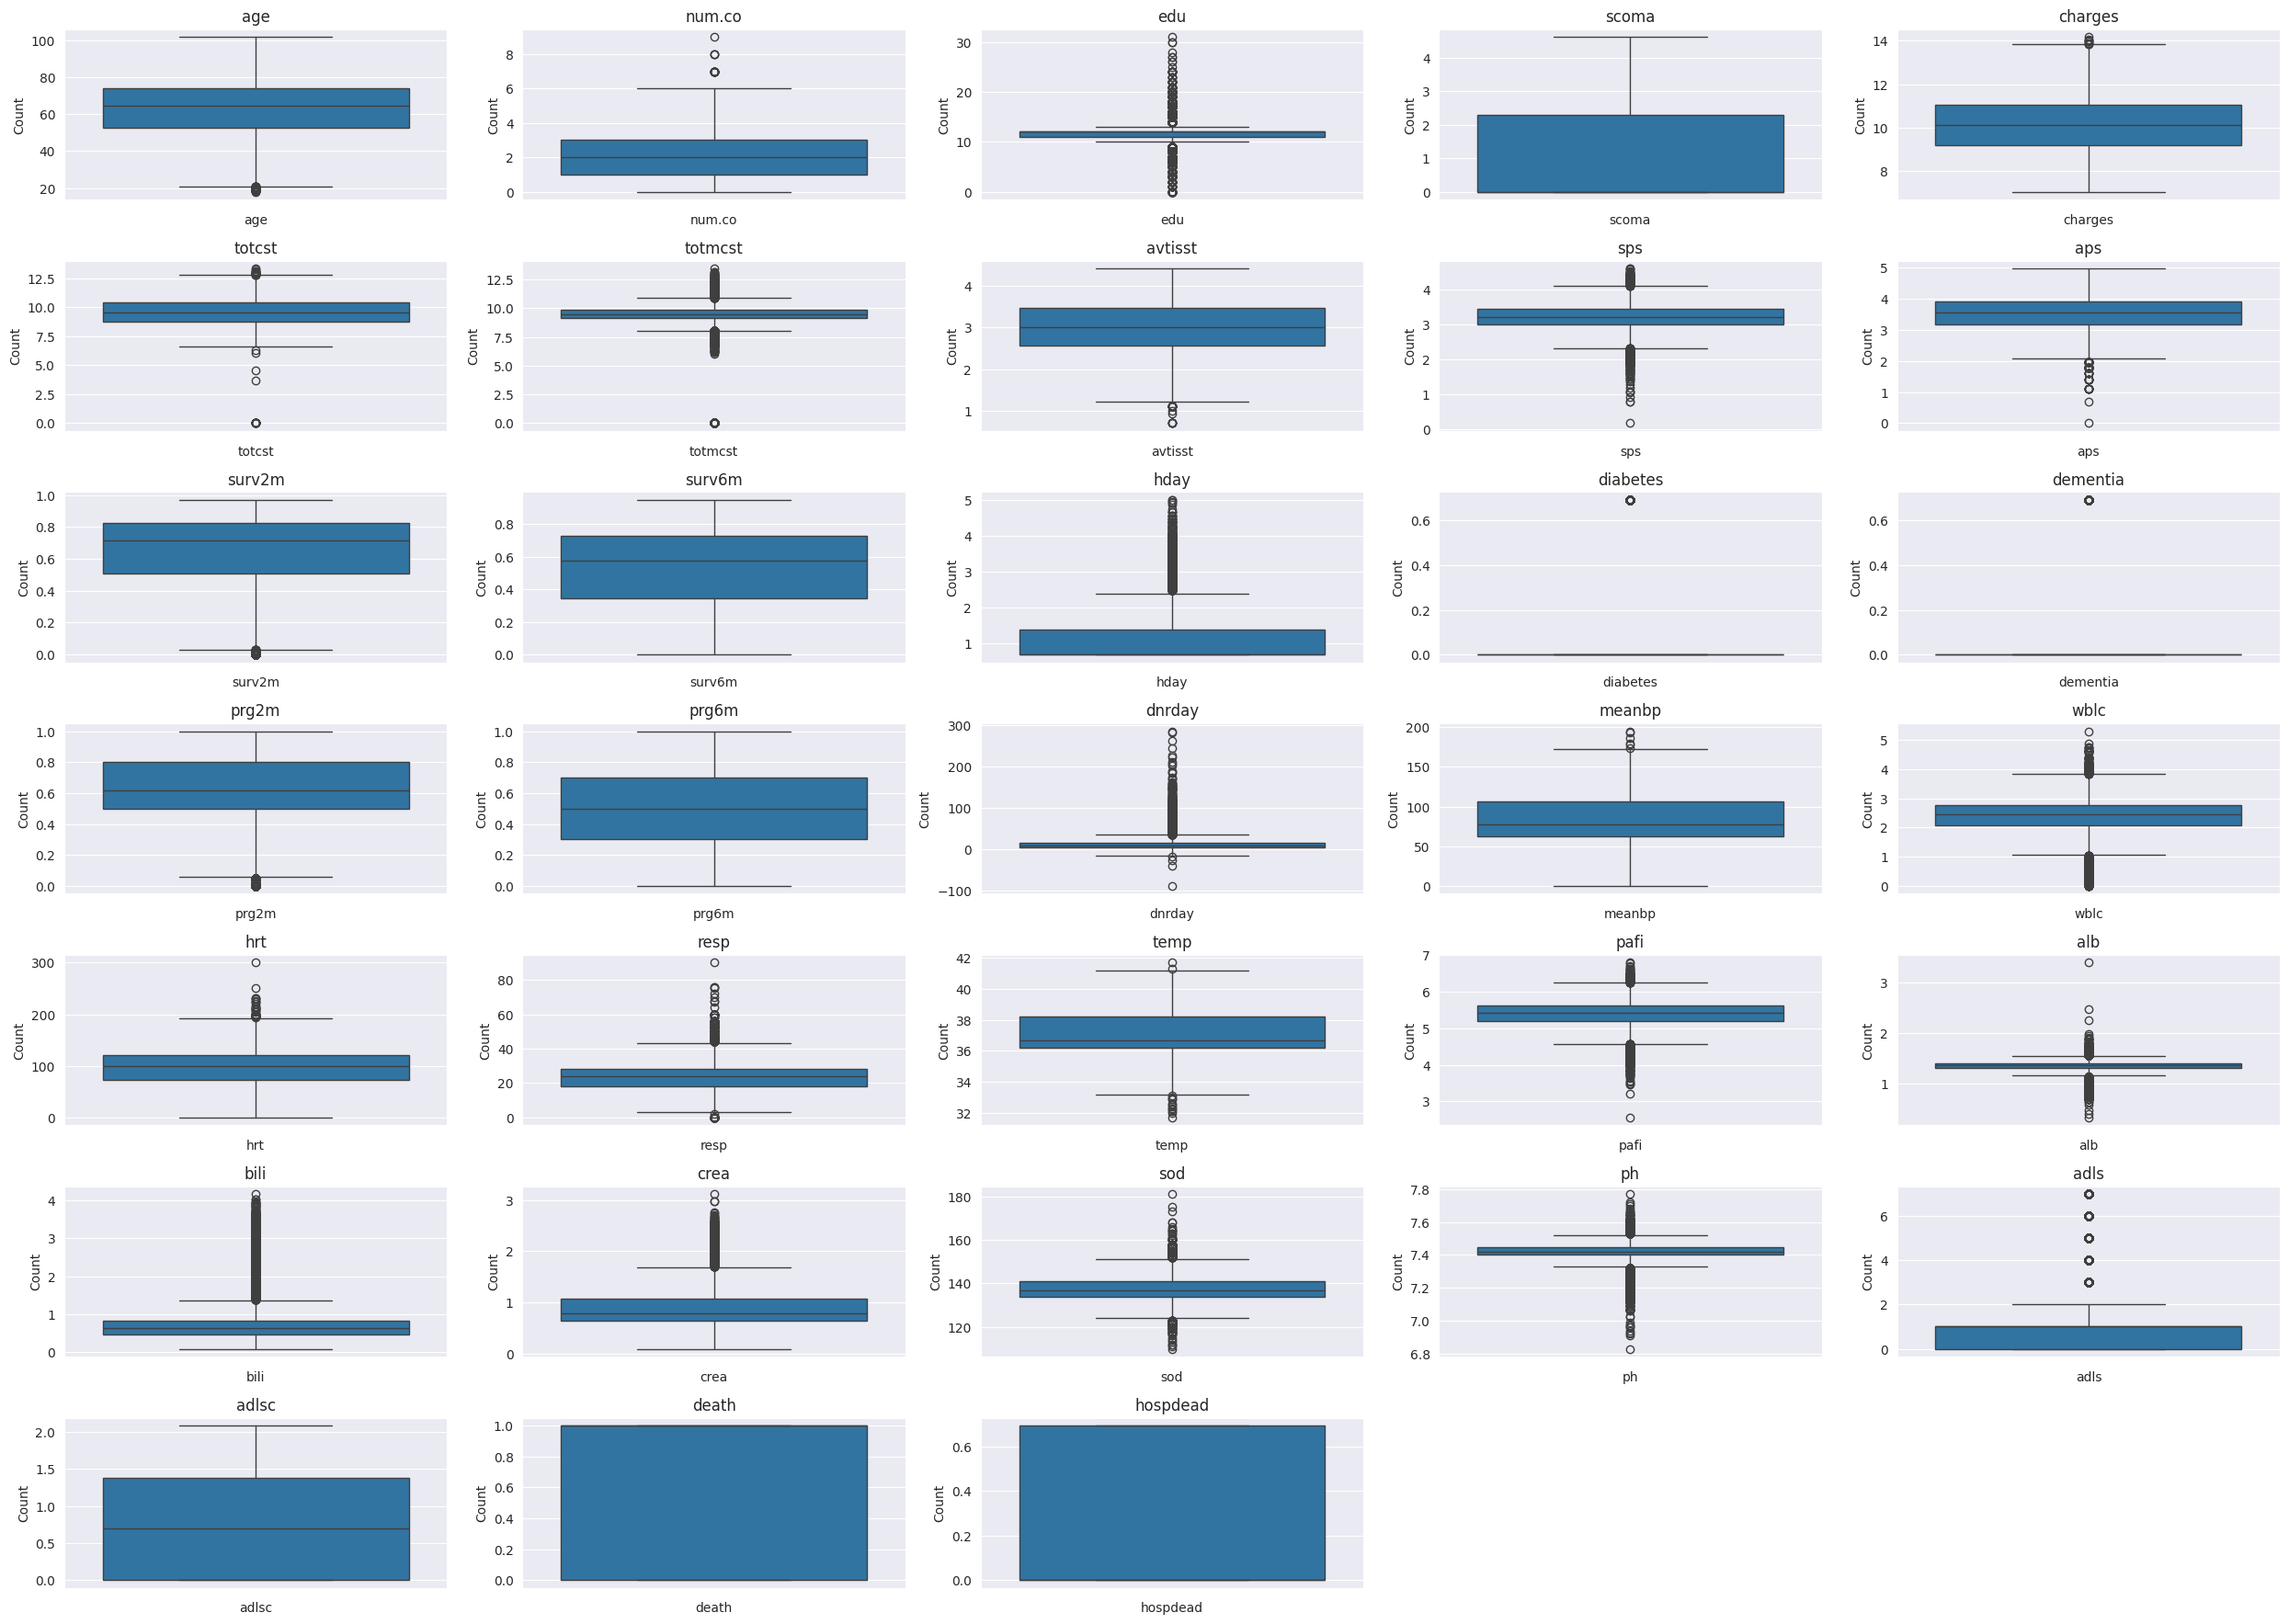

In [33]:
# cek outlier menggunakan boxplot
nums_outlier = [i for i in df.columns if df[i].dtypes != 'O']

plt.figure(figsize=(25,20))
for i, j in enumerate(nums_outlier):
  plt.subplot(8, 5, i+1)
  sns.boxplot(df[j])
  plt.title(j)
  plt.xlabel(j)
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [34]:
df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,alb,bili,crea,sod,ph,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.000000,9.181529,9.578708,...,1.029550,0.182306,0.788435,141.0,7.459961,7.0,2.079442,0,0.000000,<2 mo. follow-up
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,3.806662,10.448628,9.578708,...,1.360952,0.641802,1.871802,132.0,7.250000,1.0,0.693147,1,0.693147,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.000000,10.623642,9.578708,...,1.360952,1.163059,1.098612,134.0,7.459961,0.0,0.000000,1,0.000000,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.000000,8.031385,9.578708,...,1.360952,0.641802,0.587746,139.0,7.419922,0.0,0.000000,1,0.000000,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,3.295837,10.822335,9.578708,...,1.360952,0.641802,0.587746,143.0,7.509766,2.0,1.098612,0,0.000000,no(M2 and SIP pres)


In [35]:
# mengubah tipe data age ke int
df['age'] = df['age'].astype(int)
df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,alb,bili,crea,sod,ph,adls,adlsc,death,hospdead,sfdm2
0,62,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.000000,9.181529,9.578708,...,1.029550,0.182306,0.788435,141.0,7.459961,7.0,2.079442,0,0.000000,<2 mo. follow-up
1,60,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,3.806662,10.448628,9.578708,...,1.360952,0.641802,1.871802,132.0,7.250000,1.0,0.693147,1,0.693147,<2 mo. follow-up
2,52,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.000000,10.623642,9.578708,...,1.360952,1.163059,1.098612,134.0,7.459961,0.0,0.000000,1,0.000000,<2 mo. follow-up
3,42,female,Lung Cancer,Cancer,2,11.0,under $11k,0.000000,8.031385,9.578708,...,1.360952,0.641802,0.587746,139.0,7.419922,0.0,0.000000,1,0.000000,no(M2 and SIP pres)
4,79,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,3.295837,10.822335,9.578708,...,1.360952,0.641802,0.587746,143.0,7.509766,2.0,1.098612,0,0.000000,no(M2 and SIP pres)


## Eksploratory Data Analysis (EDA)

In [36]:
# pisahkan ke tiap tipe data
df_eda_cat = [i for i in df.columns if df[i].dtypes != 'float64']
df_eda_num = [i for i in df.columns if df[i].dtypes == 'float64']

print(f'Fitur kategorikal: {df_eda_cat}')
print(f'Total fitur kategorikal: {len(df_eda_cat)}\n')
print(f'Fitur numerik: {df_eda_num}')
print(f'Total fitur numerik: {len(df_eda_num)}')

Fitur kategorikal: ['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'income', 'race', 'ca', 'dnr', 'death', 'sfdm2']
Total fitur kategorikal: 11

Fitur numerik: ['edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'adls', 'adlsc', 'hospdead']
Total fitur numerik: 30


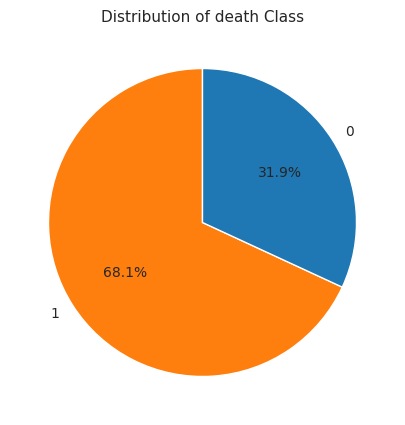

In [37]:
# cek distribusi target var
plt.figure(figsize=(10, 5))
plt.pie(df['death'].value_counts(), labels=df['death'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#ff7f0e', '#1f77b4'])
plt.title('Distribution of death Class', size=11)
plt.show()

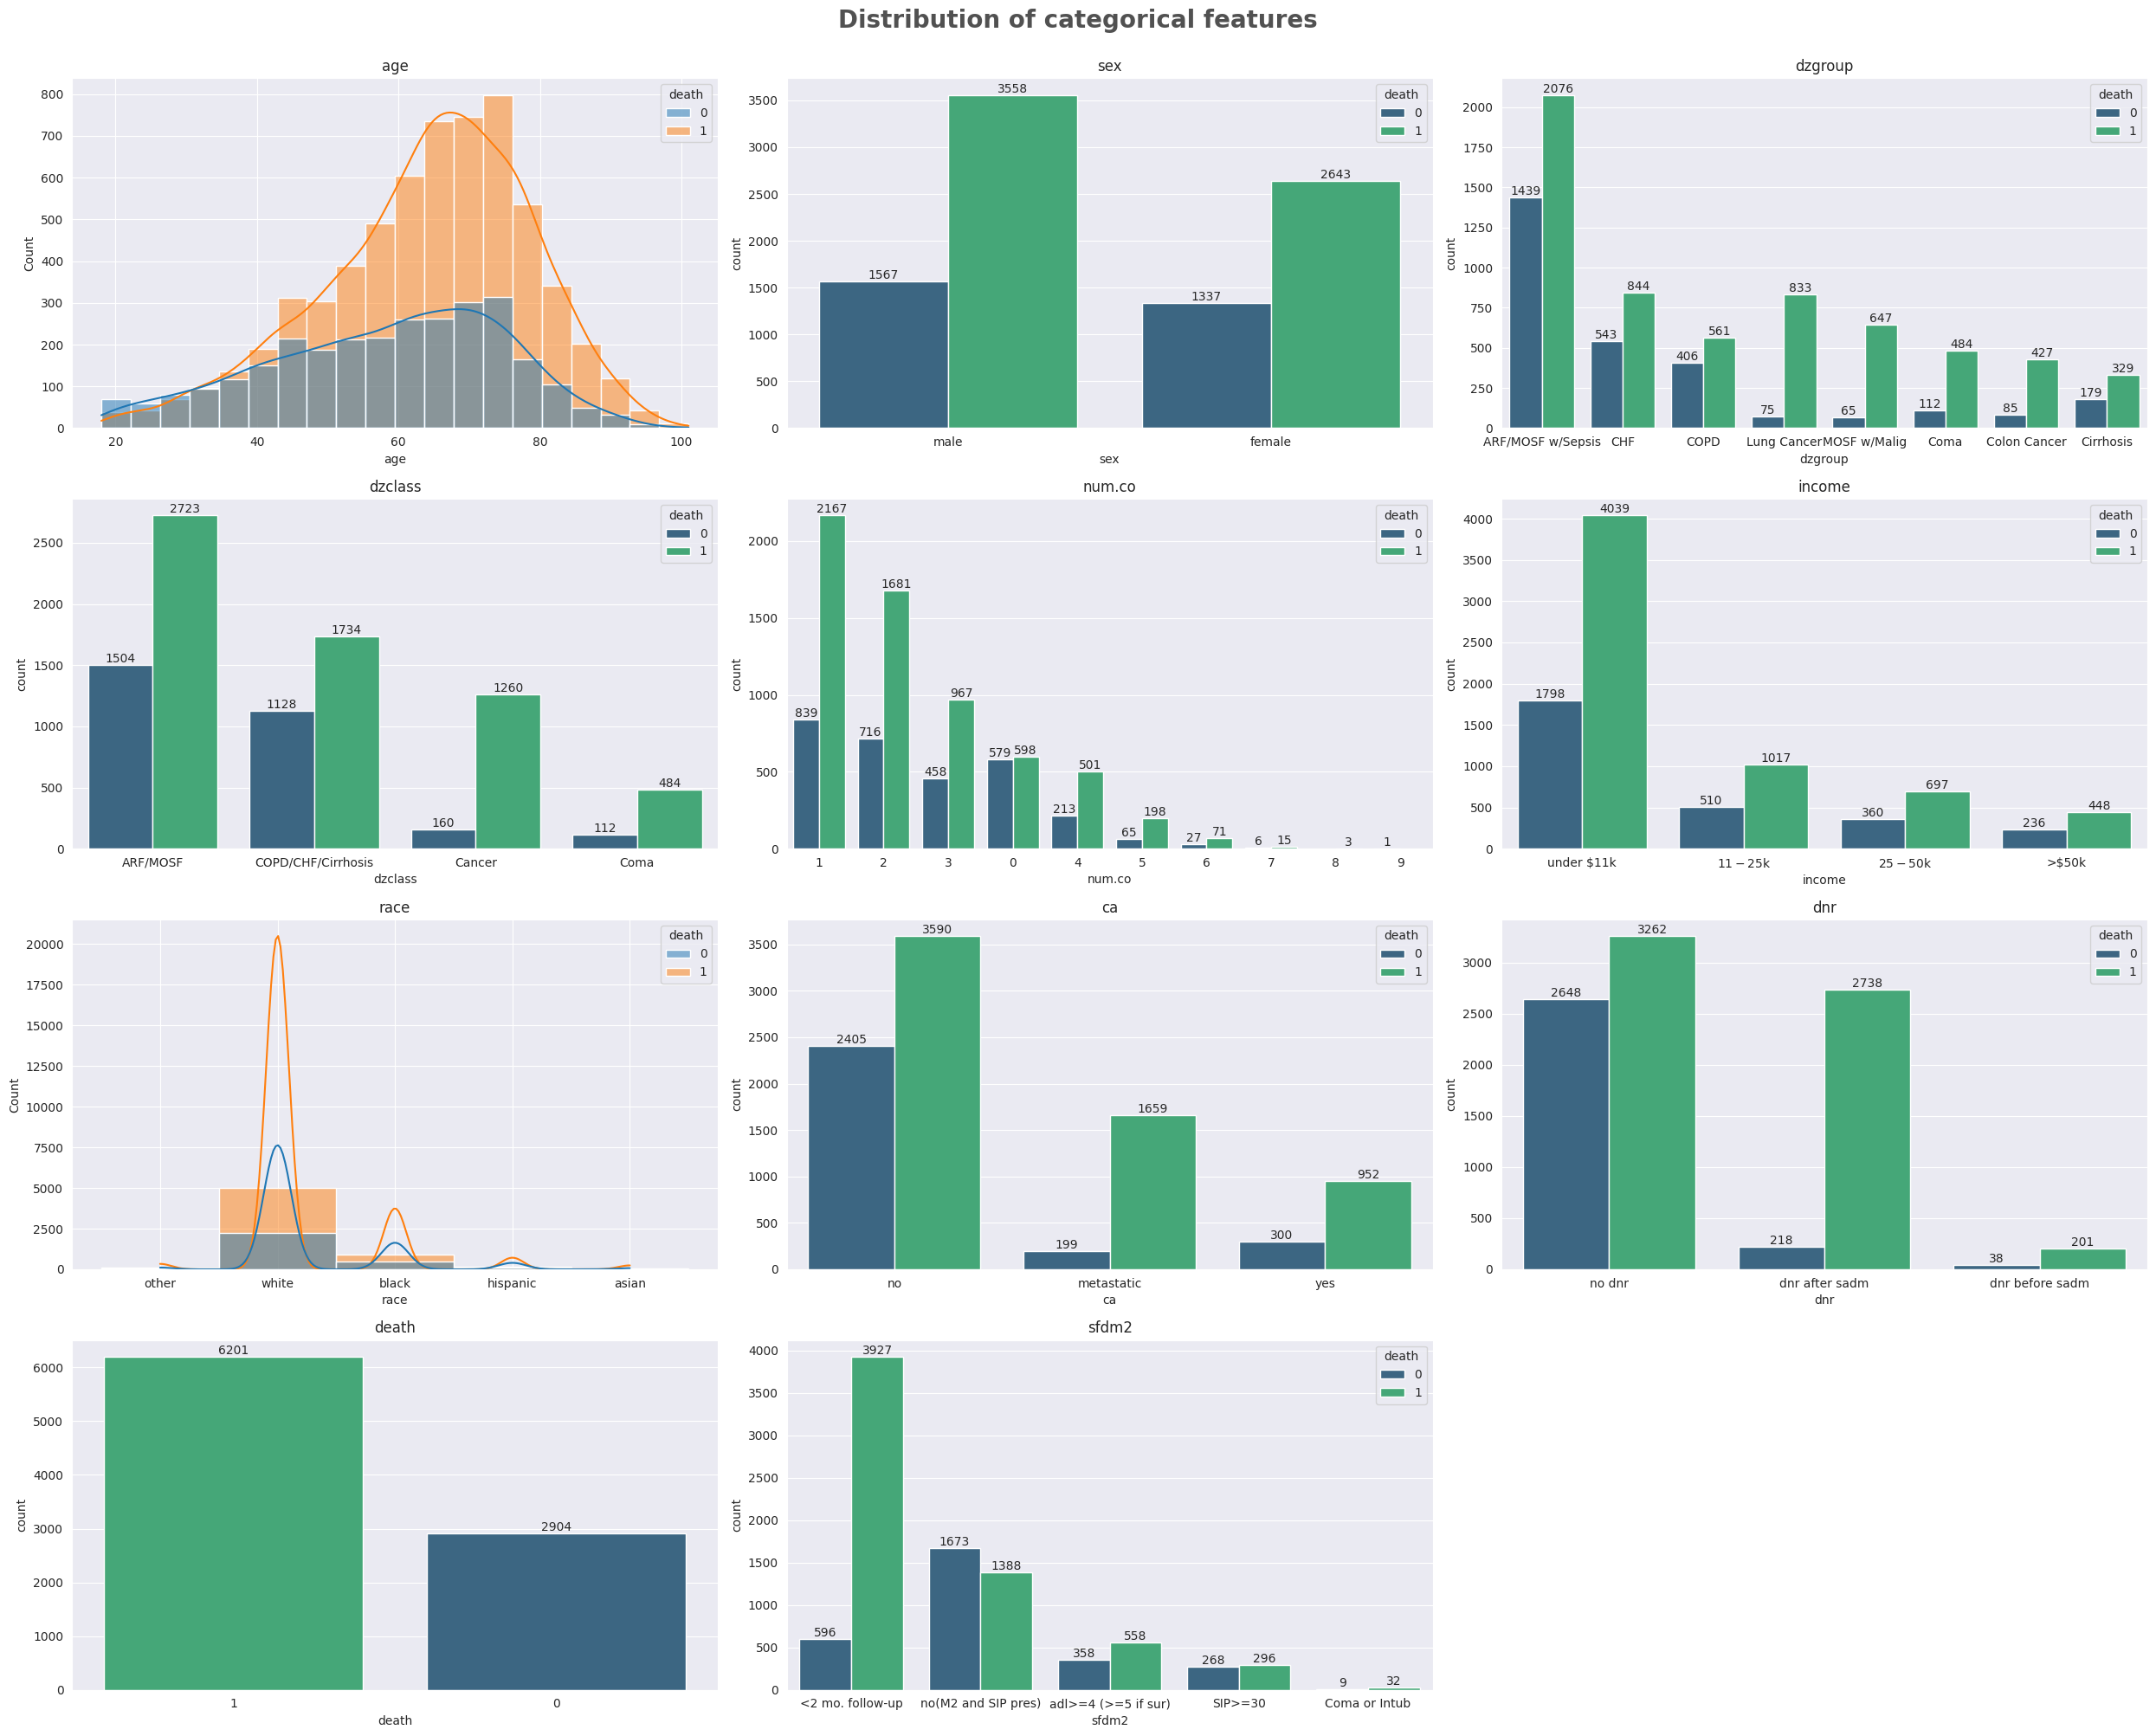

In [38]:
# distribusi var cat
plt.figure(figsize=(25, 20))
plt.suptitle('Distribution of categorical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
df['death'] = df['death'].astype(str)

for i, j in enumerate(df_eda_cat):
    plt.subplot(4, 3, i+1)

    if i in [0, 6]:
        ax = sns.histplot(data=df, x=j, kde=True, bins=20, color='pastel', hue='death')
    else:
        ax = sns.countplot(x=df[j], data=df, palette='viridis', order=df[j].value_counts().index, hue='death')
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', size=10)

    plt.title(j)
    plt.xlabel(j)

plt.tight_layout()
plt.show()

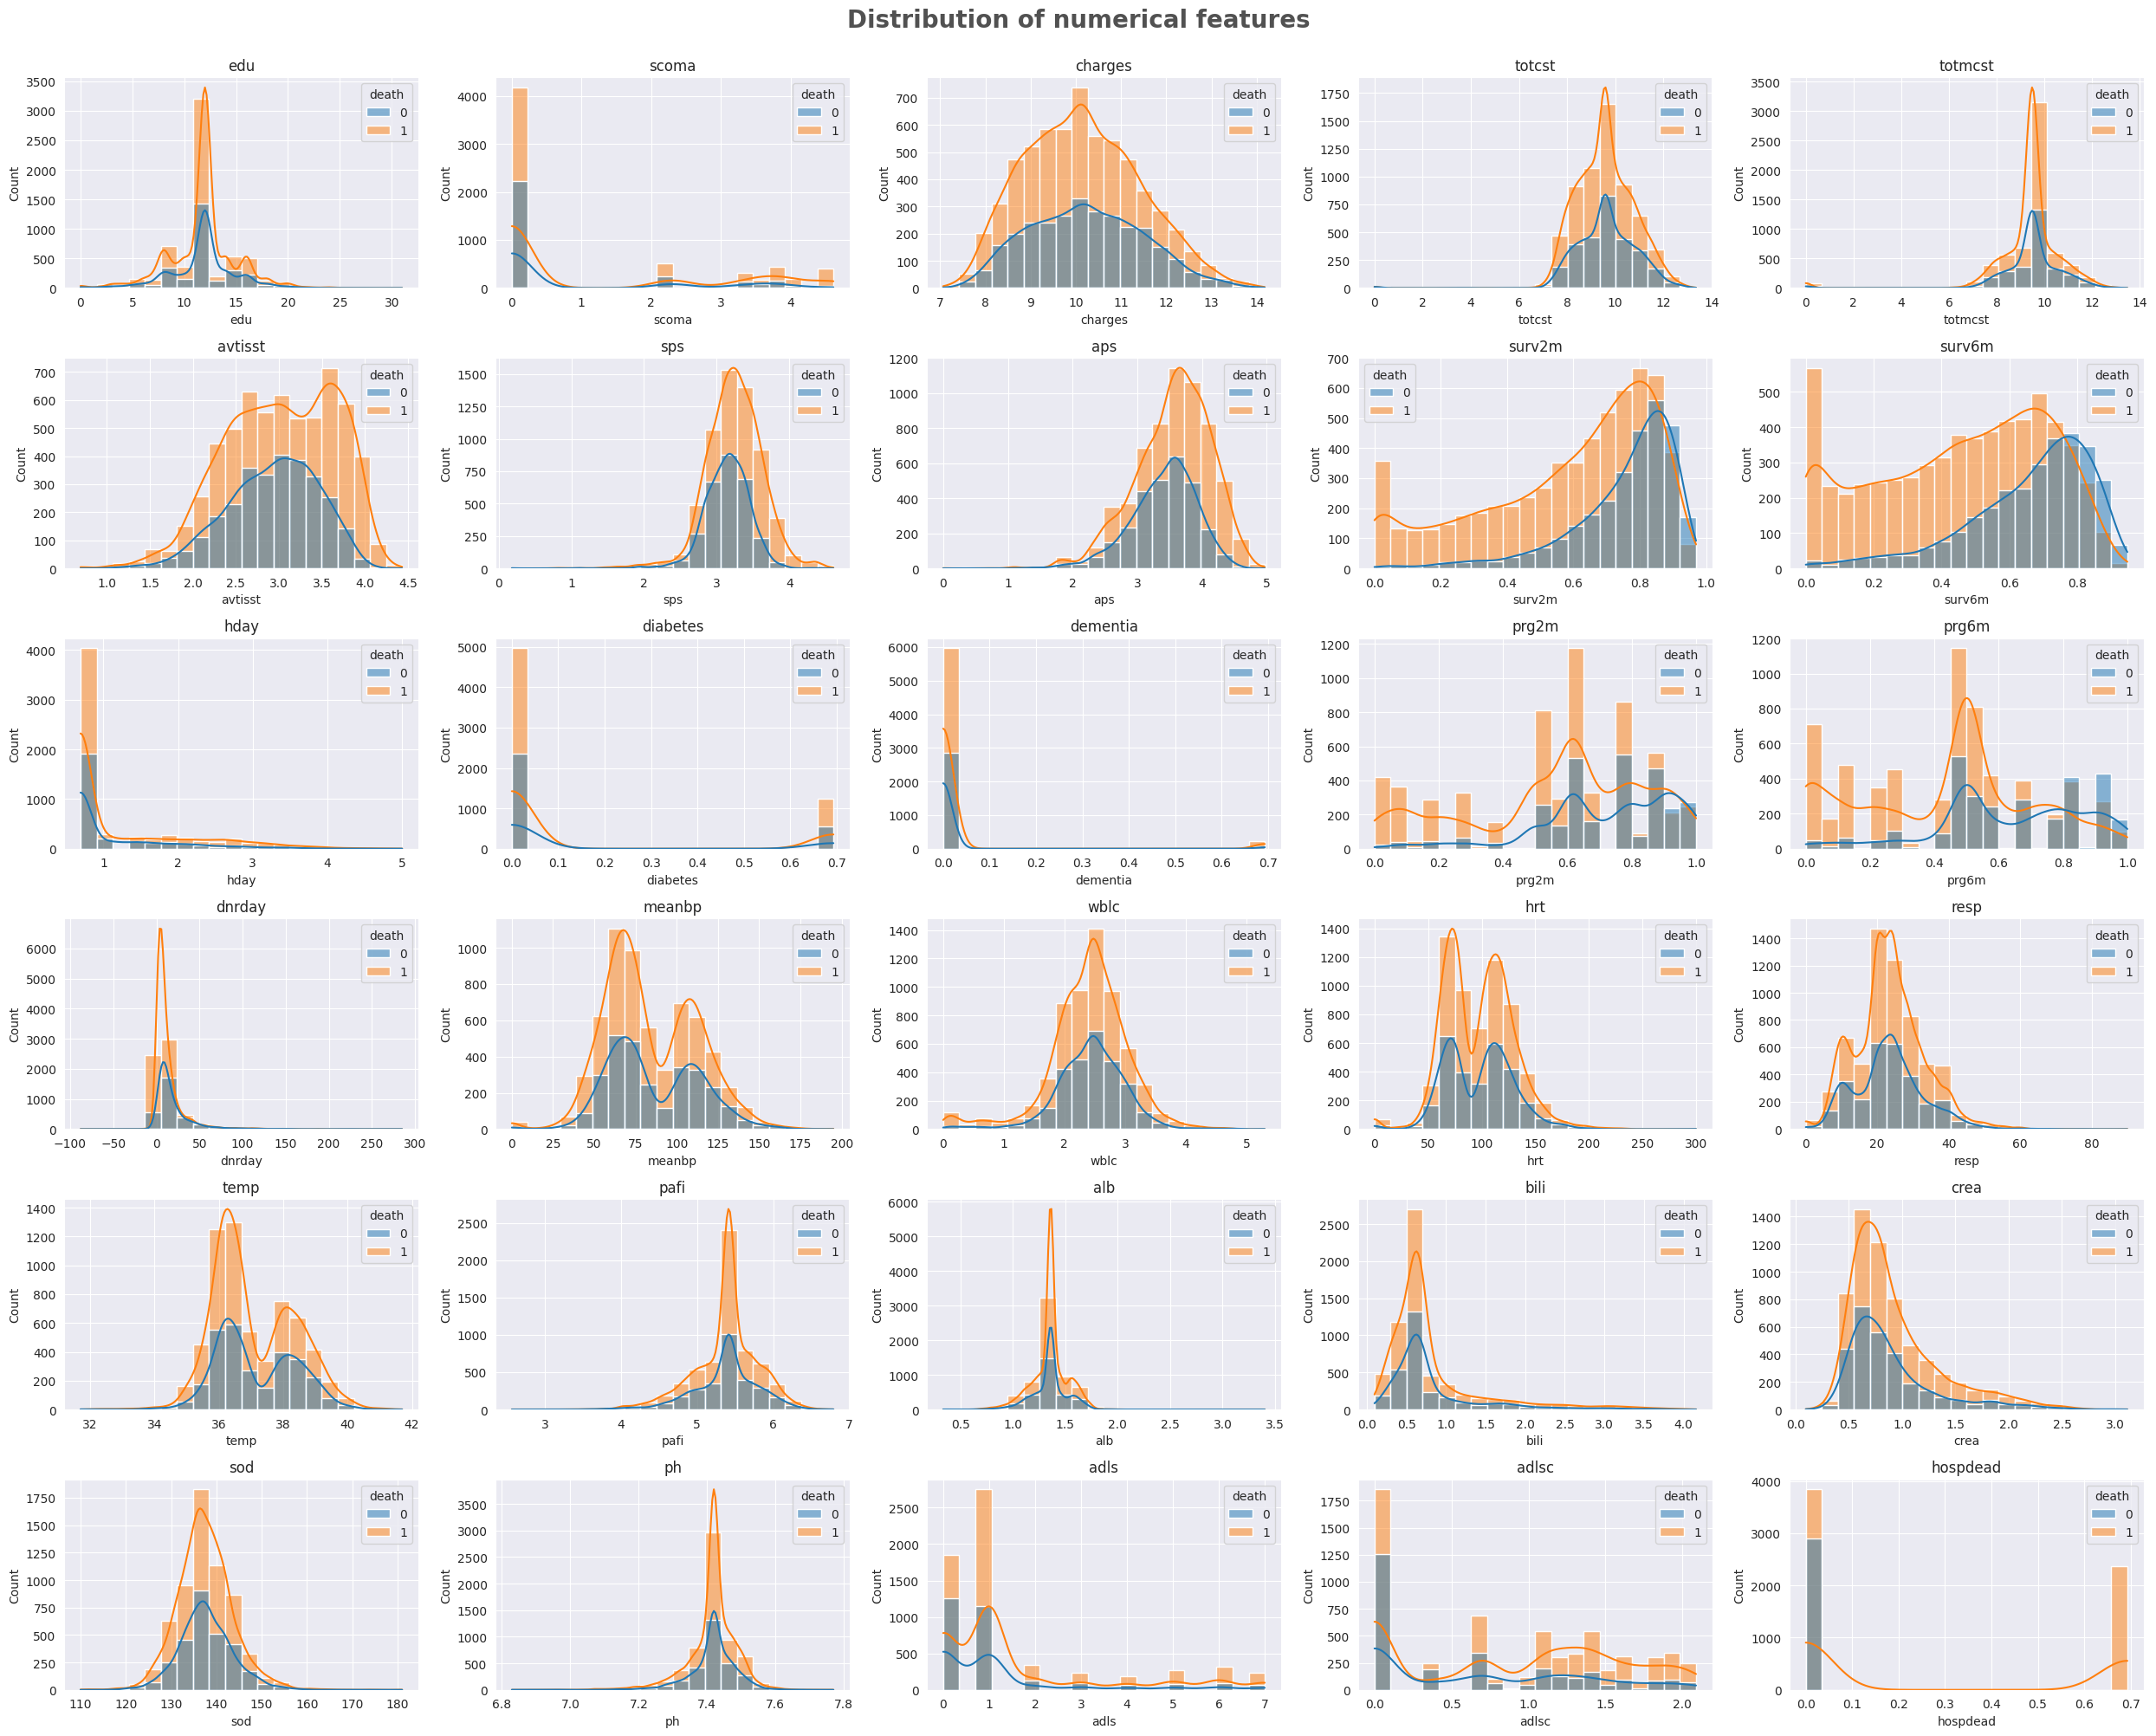

In [39]:
# distribusi num cat
plt.figure(figsize=(25, 20))
plt.suptitle('Distribution of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, j in enumerate(df_eda_num):
  plt.subplot(6, 5, i+1)
  sns.histplot(data=df, x=j, kde=True, bins=20, color='pastel', hue='death')
  plt.title(j)
  plt.xlabel(j)

plt.tight_layout()
plt.show()

## Feature Engineering

In [40]:
df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,alb,bili,crea,sod,ph,adls,adlsc,death,hospdead,sfdm2
0,62,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.000000,9.181529,9.578708,...,1.029550,0.182306,0.788435,141.0,7.459961,7.0,2.079442,0,0.000000,<2 mo. follow-up
1,60,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,3.806662,10.448628,9.578708,...,1.360952,0.641802,1.871802,132.0,7.250000,1.0,0.693147,1,0.693147,<2 mo. follow-up
2,52,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.000000,10.623642,9.578708,...,1.360952,1.163059,1.098612,134.0,7.459961,0.0,0.000000,1,0.000000,<2 mo. follow-up
3,42,female,Lung Cancer,Cancer,2,11.0,under $11k,0.000000,8.031385,9.578708,...,1.360952,0.641802,0.587746,139.0,7.419922,0.0,0.000000,1,0.000000,no(M2 and SIP pres)
4,79,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,3.295837,10.822335,9.578708,...,1.360952,0.641802,0.587746,143.0,7.509766,2.0,1.098612,0,0.000000,no(M2 and SIP pres)


In [41]:
# convert death ke tipe data numerik
df['death'] = df['death'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   int64  
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       9105 non-null   float64
 6   income    9105 non-null   object 
 7   scoma     9105 non-null   float64
 8   charges   9105 non-null   float64
 9   totcst    9105 non-null   float64
 10  totmcst   9105 non-null   float64
 11  avtisst   9105 non-null   float64
 12  race      9105 non-null   object 
 13  sps       9105 non-null   float64
 14  aps       9105 non-null   float64
 15  surv2m    9105 non-null   float64
 16  surv6m    9105 non-null   float64
 17  hday      9105 non-null   float64
 18  diabetes  9105 non-null   float64
 19  dementia  9105 non-null   float64
 20  ca        9105 non-null   obje

In [43]:
# list fitur untuk encoding
feature_encoding = [i for i in df.columns if df[i].dtypes == 'O']
df[feature_encoding]

,sex,dzgroup,dzclass,income,race,ca,dnr,sfdm2
0,male,Lung Cancer,Cancer,$11-$25k,other,metastatic,no dnr,<2 mo. follow-up
1,female,Cirrhosis,COPD/CHF/Cirrhosis,$11-$25k,white,no,no dnr,<2 mo. follow-up
2,female,Cirrhosis,COPD/CHF/Cirrhosis,under $11k,white,no,no dnr,<2 mo. follow-up
3,female,Lung Cancer,Cancer,under $11k,white,metastatic,no dnr,no(M2 and SIP pres)
4,female,ARF/MOSF w/Sepsis,ARF/MOSF,under $11k,white,no,no dnr,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...
9100,male,ARF/MOSF w/Sepsis,ARF/MOSF,under $11k,white,no,no dnr,<2 mo. follow-up
9101,female,Coma,Coma,under $11k,white,no,no dnr,<2 mo. follow-up
9102,male,ARF/MOSF w/Sepsis,ARF/MOSF,under $11k,white,no,no dnr,<2 mo. follow-up
9103,male,MOSF w/Malig,ARF/MOSF,under $11k,white,yes,dnr after sadm,<2 mo. follow-up


In [44]:
# inisialisasi ohe
ohe = OneHotEncoder(drop='first')

# list fitur untuk ohe
fitur_ohe = feature_encoding

# fit ohe
ohe.fit(df[fitur_ohe])

# transform ohe
ohe_df = pd.DataFrame(ohe.transform(df[fitur_ohe]).toarray(), columns=ohe.get_feature_names_out())

# concat
df = pd.concat([df, ohe_df], axis=1)

# drop fitur sesudah ohe
df.drop(fitur_ohe, axis=1, inplace=True)
df.head()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr,sfdm2_Coma or Intub,sfdm2_SIP>=30,sfdm2_adl>=4 (>=5 if sur),sfdm2_no(M2 and SIP pres)
0,62,0,11.0,0.000000,9.181529,9.578708,9.490237,2.079442,3.552442,3.044522,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,60,2,12.0,3.806662,10.448628,9.578708,9.490237,3.401197,3.983326,4.317488,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,52,2,12.0,0.000000,10.623642,9.578708,9.490237,2.639057,3.068053,3.828641,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,42,2,11.0,0.000000,8.031385,9.578708,9.490237,2.079442,3.049162,2.995732,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79,1,12.0,3.295837,10.822335,9.578708,9.490237,2.978925,3.198673,3.433987,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
# dropna setelah encoding
df.dropna(inplace=True)

In [46]:
# cek shape sebelum modelling
df.shape

(9105, 59)

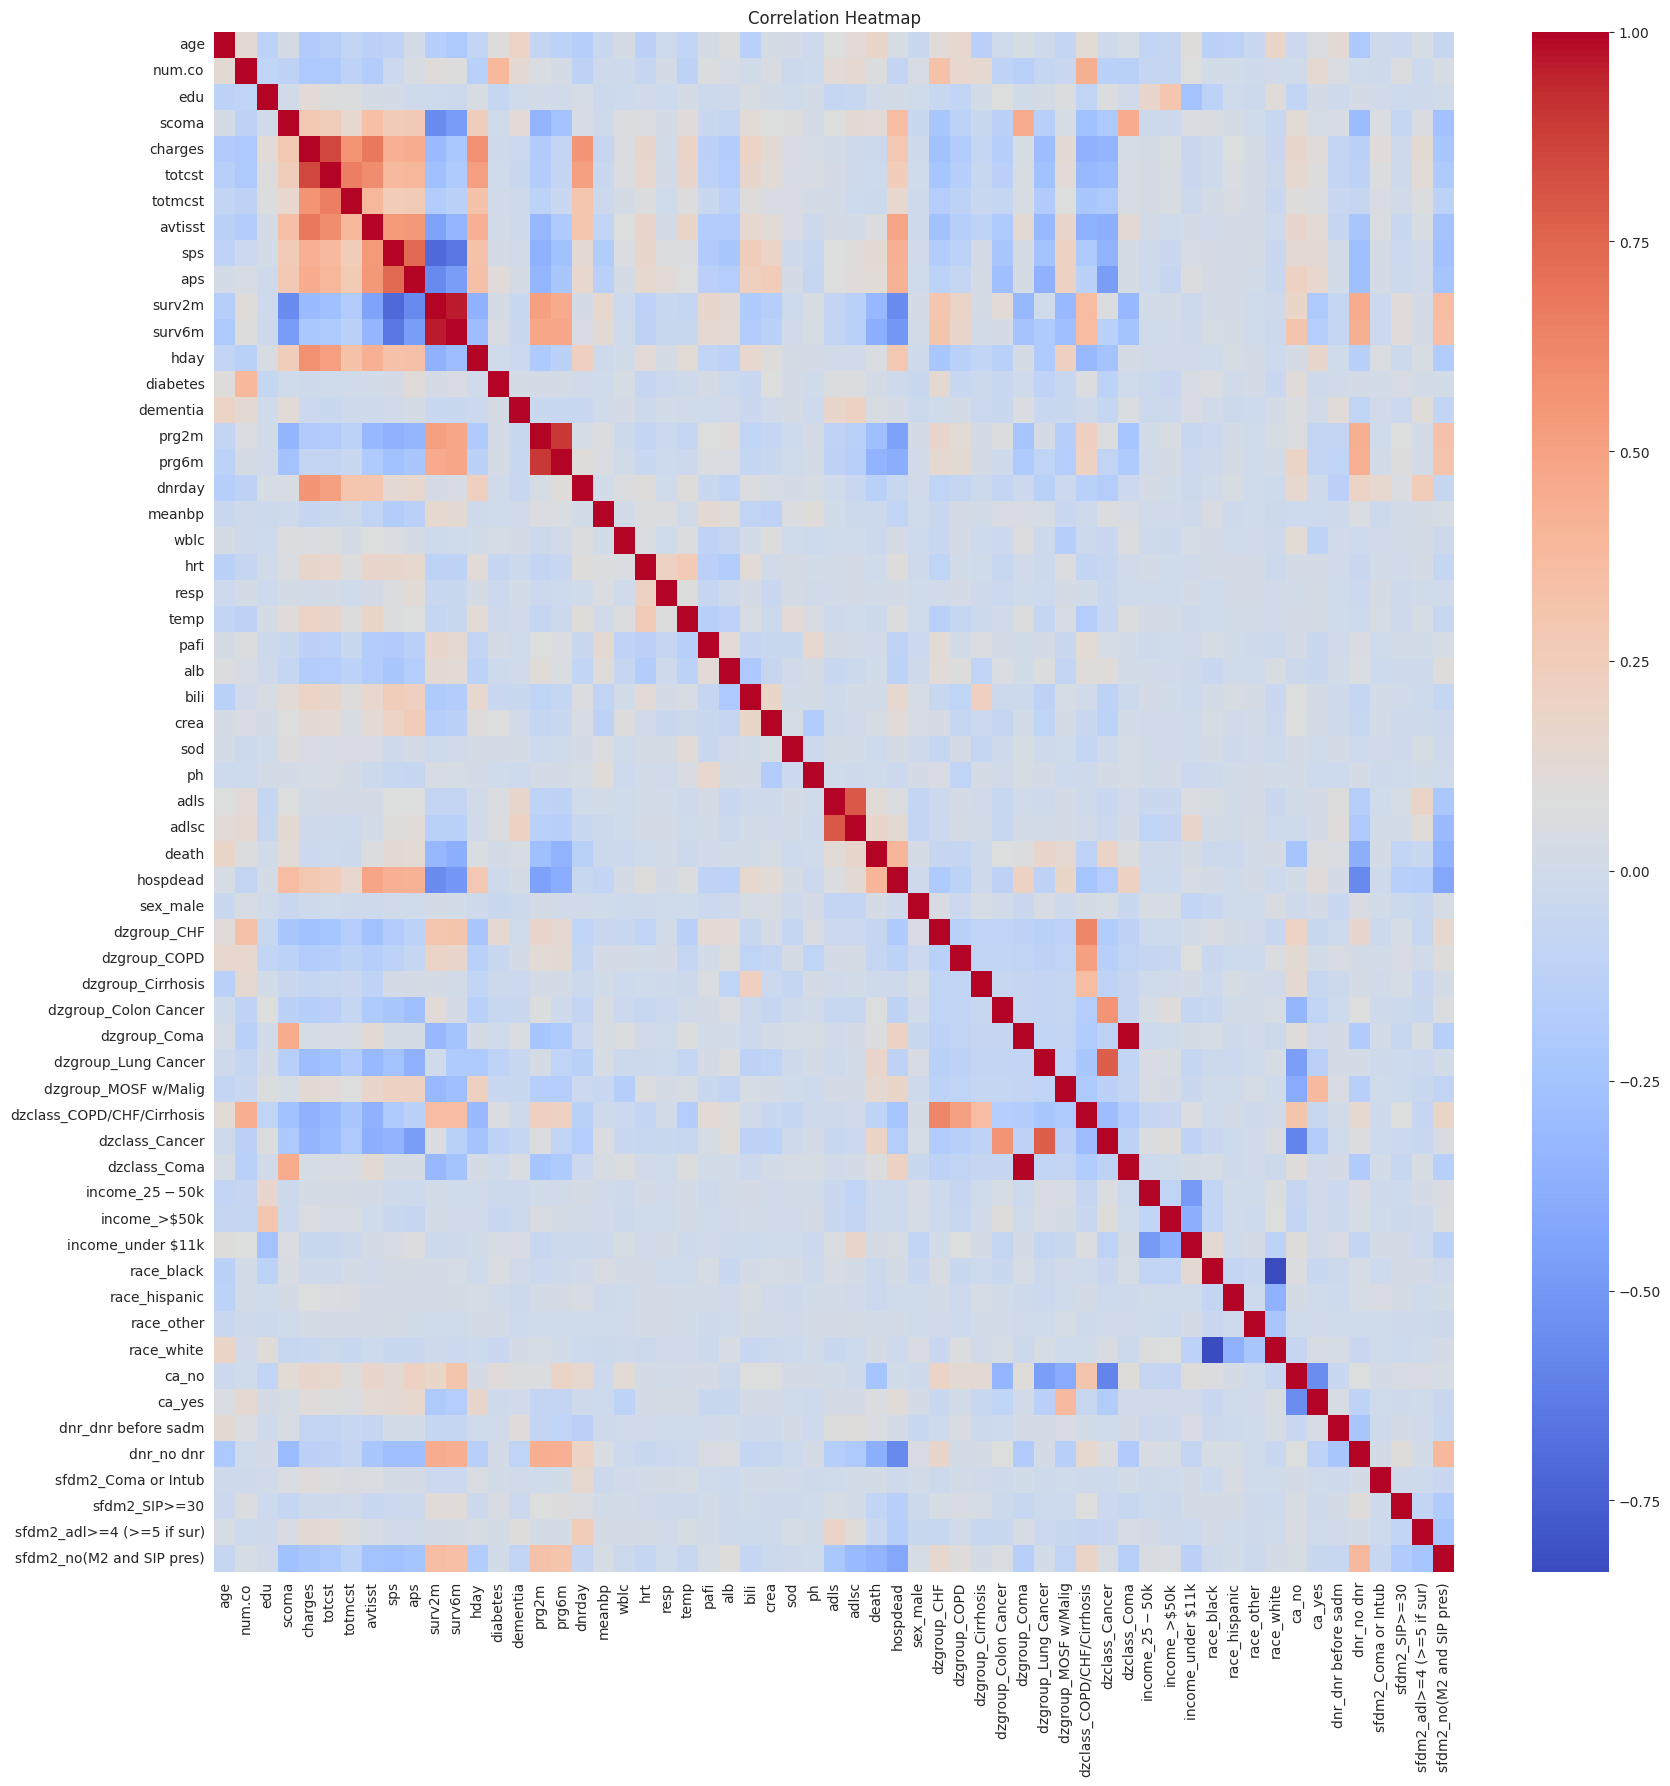

In [47]:
# correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
# cek vif pada tiap fitur
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.drop('death', axis=1).values, i) for i in range(df.drop('death', axis=1).shape[1])]
vif['Features'] = df.drop('death', axis=1).columns
vif.sort_values(by='VIF', ascending=False)

,VIF,Features
38,inf,dzgroup_Lung Cancer
34,inf,dzgroup_COPD
40,inf,dzclass_COPD/CHF/Cirrhosis
42,inf,dzclass_Coma
41,inf,dzclass_Cancer
33,inf,dzgroup_CHF
35,inf,dzgroup_Cirrhosis
36,inf,dzgroup_Colon Cancer
37,inf,dzgroup_Coma
28,2788.821830,ph


In [49]:
# # identifikasi fitur vif tinggi
# high_vif_features = vif[vif['VIF'] > 10]['Features'].tolist()

# while high_vif_features:
#     feature_to_remove = high_vif_features[0]
#     df = df.drop(columns=[feature_to_remove])

#     vif = pd.DataFrame()
#     vif['VIF'] = [variance_inflation_factor(df.drop('death', axis=1).values, i) for i in range(df.drop('death', axis=1).shape[1])]
#     vif['Features'] = df.drop('death', axis=1).columns
#     vif = vif.sort_values(by='VIF', ascending=False)

#     high_vif_features = vif[vif['VIF'] > 10]['Features'].tolist()

# vif

In [50]:
# # cek total fitur var vif
# vif.shape

In [51]:
# # fitur dengan VIF rendah
# selected_features = vif['Features'].tolist()
# selected_features.append('death')
# df_selected = df[selected_features]
# df_selected.head()

## Data Modelling

In [52]:
# data splitting
X = df.drop('death', axis=1)
y = df['death']

In [53]:
# cek distribusi y class
y.value_counts()

,count
death,
1,6201
0,2904


In [54]:
# resampling menggunakan smote
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
# cek lagi distribusi stelah resampling
y_resampled.value_counts()

,count
death,
0,6201
1,6201


In [56]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

<Axes: >

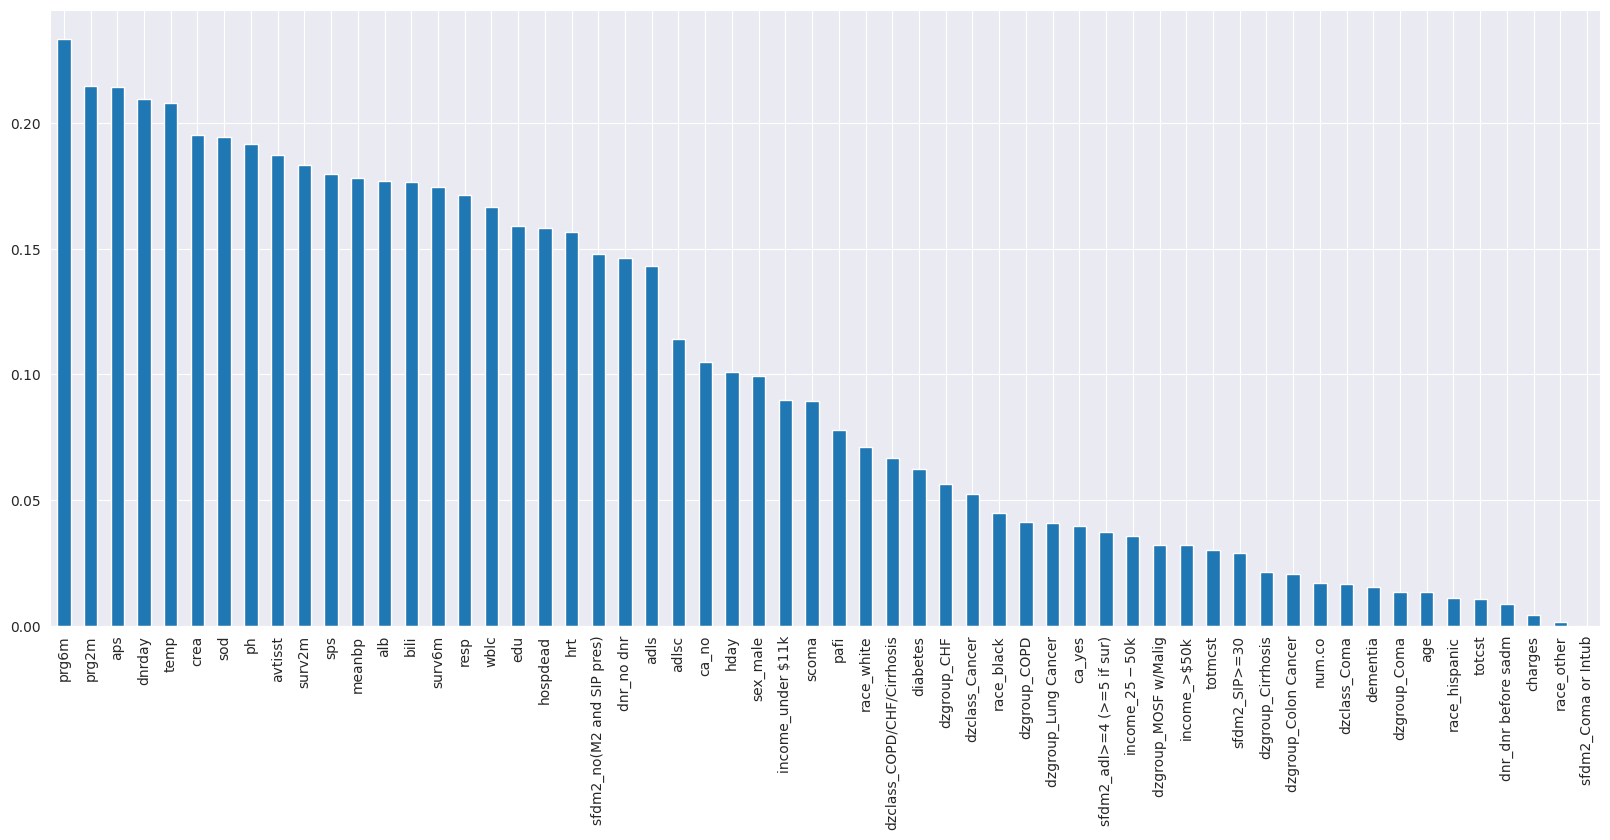

In [57]:
# inisialisasi mutual info
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [58]:
# feature selection
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X_train, y_train)
X_train.columns[sel_ten_cols.get_support()]

Index(['avtisst', 'aps', 'surv6m', 'prg2m', 'prg6m', 'dnrday', 'temp', 'crea',
       'sod', 'ph'],
      dtype='object')

In [59]:
# ambil top 10 fitur
X_train_selected = sel_ten_cols.fit_transform(X_train, y_train)
X_test_selected = sel_ten_cols.transform(X_test)

In [60]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# inisialisasi knn
knn = KNeighborsClassifier()

# fitting
knn.fit(X_train_scaled, y_train)

# prediksi
y_pred = knn.predict(X_test_scaled)

## Model Evaluation

In [62]:
# prediksi
y_pred = knn.predict(X_test_scaled)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1241
           1       0.89      0.71      0.79      1240

    accuracy                           0.81      2481
   macro avg       0.83      0.81      0.81      2481
weighted avg       0.83      0.81      0.81      2481



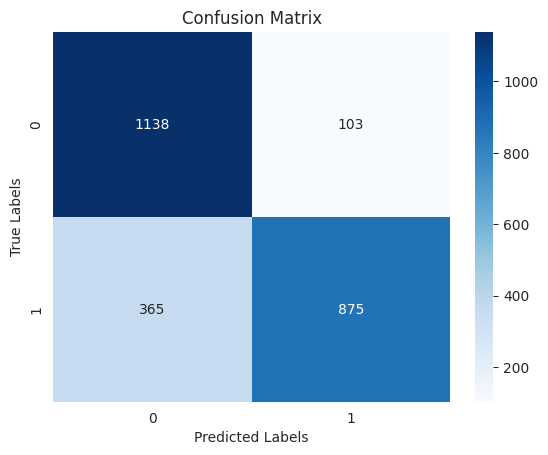

In [63]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

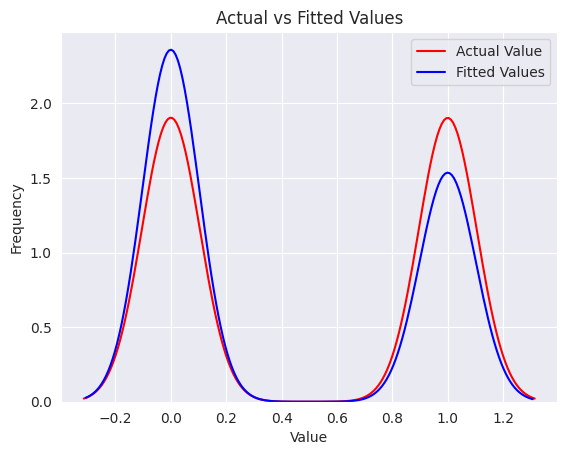

In [64]:
# distribution plot
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values' , ax=ax)
plt.title('Actual vs Fitted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()